In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import boxcox

Importing the datasets

In [3]:
import pandas as pd

# UCI Census Income dataset URL
census_income_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Define column names based on dataset documentation
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(census_income_url, header=None, names=columns, skipinitialspace=True)

# Display the first few rows of the dataset
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()
#df.head() is used to load the first few rows of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.tail()
#df.tail() is used to load last few rows of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## EDA and Visualisation


1. Load the file using Pandas
2. Look at some information about the
data & the columns
3. Fix any missing or incorrect values

In [6]:
#To know the datatype
dtypes = df.dtypes.value_counts()
display(dtypes)

object    9
int64     6
dtype: int64

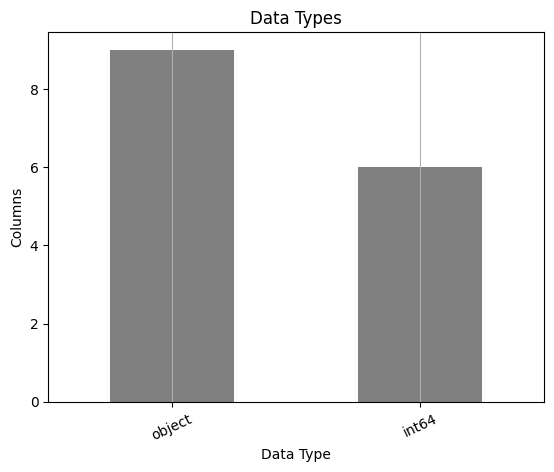

In [7]:
#To visually represent the data
dtypes.plot(kind='bar', color='grey')
plt.title('Data Types')
plt.ylabel('Columns')
plt.xlabel('Data Type')
plt.xticks(rotation=25)
plt.grid(axis='x')
plt.show()

In [8]:
len (df.columns)
#to know the number of columns

15

In [9]:
#to know the column name
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
#To know the rows
len(df)

32561

In [11]:
df.describe()
#describe will give the information about the dataset

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000




*   count: Number of non-null values in the column.
*   mean: Mean (average) value of the column.
*   std: Standard deviation, a measure of the spread of the values.
*   min: Minimum value in the column.
*   25%: First quartile (Q1), the value below which 25% of the data falls.
*   50%: Second quartile (Q2), the median, the value below which 50% of the data falls.
*   75%: Third quartile (Q3), the value below which 75% of the data falls.
max: Maximum value in the column.









In [12]:
# Select columns with object (string) data type
string_columns = df.select_dtypes(include=['object']).columns

# Check if any of the selected columns contain string values
contains_strings = df[string_columns].applymap(lambda x: isinstance(x, str)).any().any()

if contains_strings:
    print("The dataset contains string values.")
else:
    print("The dataset does not contain string values.")


The dataset contains string values.


In [13]:
print("Dataset(rows,columns):",df.shape)

Dataset(rows,columns): (32561, 15)


In [14]:
df.drop_duplicates()
df.shape

(32561, 15)

There are no duplicate values in this dataset

##1. To address the question **"What are the numerical and categorial features in this dataset?"**

In [15]:
# Finding numerical features
numerical_features = df.select_dtypes(include=['float', 'int']).columns.tolist()

# Finding categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Displaying the results
print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Categorical Features:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [16]:
#Display summary statistics for numerical features
print(df[['age','education-num','capital-gain', 'capital-loss', 'hours-per-week']].describe())

                age  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


In [17]:
# Display summary statistics for categorical features
print(df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']].describe())

       workclass education      marital-status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native-country income  
count   32561  32561          32561  32561  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720  


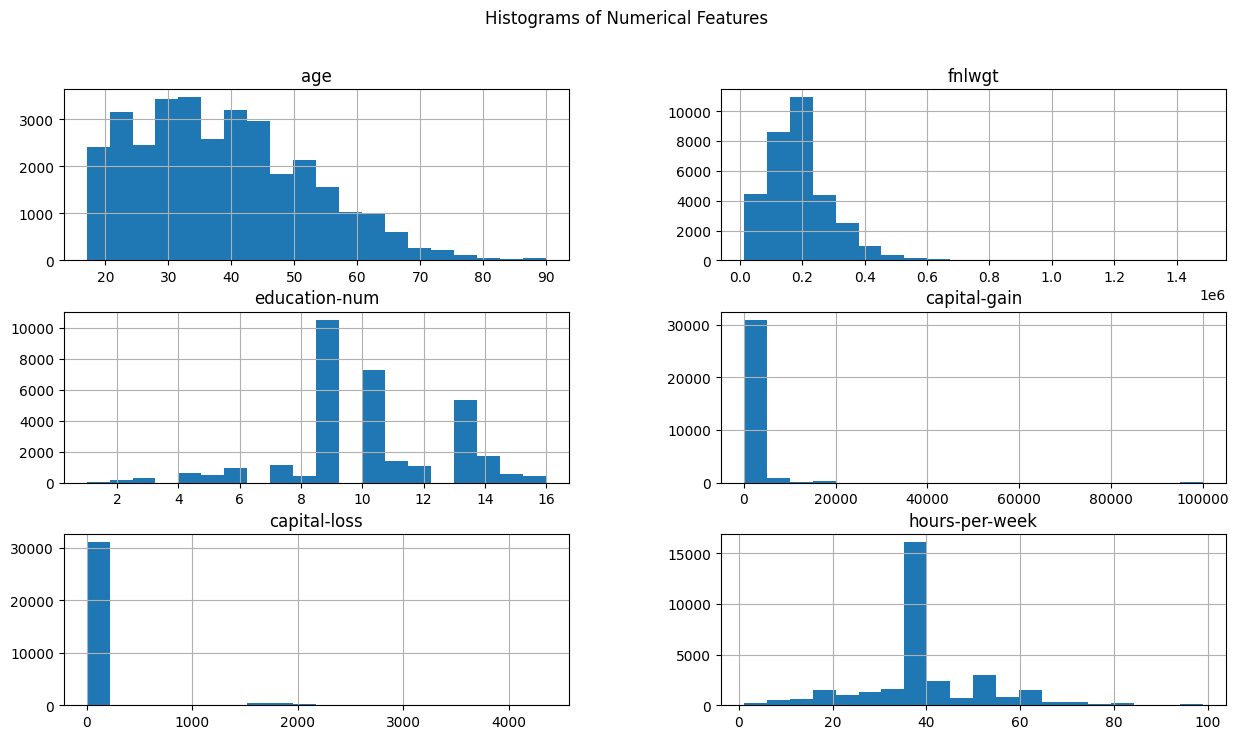

In [18]:
#to visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['number'])

numerical_features.hist(figsize=(15,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

## **2. To check for Missing Values in the dataset**

In [20]:
df.replace("?", pd.NA, inplace=True)

In [21]:
# Check for missing values in the entire DataFrame
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [23]:
# Print total number of NaN values
print('NaN values =', df.isnull().sum().sum())
print("\n")

missing_var = []

for feature in df.columns:
    miss = df[feature].isna().sum()
    if miss > 0:
        missing_var.append(feature)
        missing_val = miss / df.shape[0]
        print('The feature {} has {} records ({:.2%}) with missing values.'.format(feature, miss, missing_val))

print('There are {} features with missing values'.format(len(missing_var)))

NaN values = 4262


The feature workclass has 1836 records (5.64%) with missing values.
The feature occupation has 1843 records (5.66%) with missing values.
The feature native-country has 583 records (1.79%) with missing values.
There are 3 features with missing values


To address the question **"Are there missing feature values for a large number of observations? If yes what are those features? Are there features that are missing that might affect other features?"**

There are no missing values in any of the features in the dataset. Since there are not any other missing values in the dataset, there won't be any features that will affect affect other features


<Axes: >

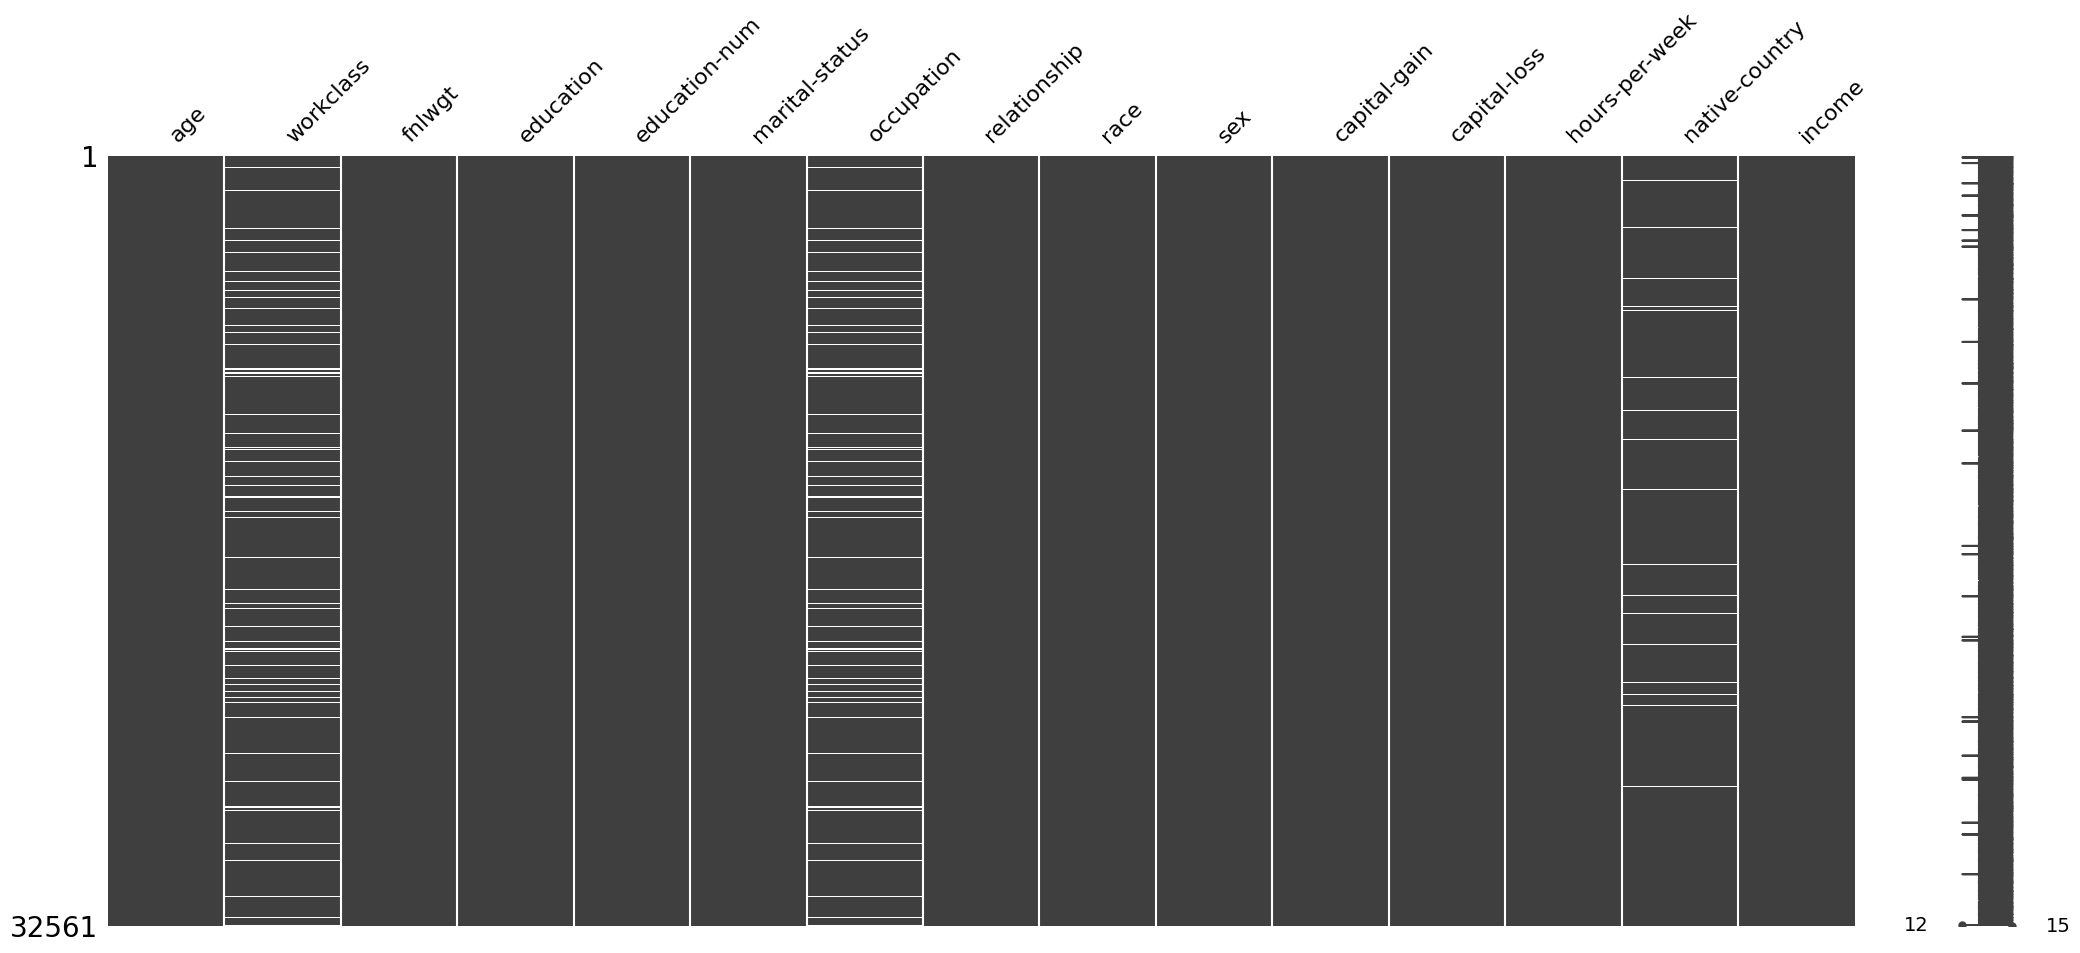

In [24]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

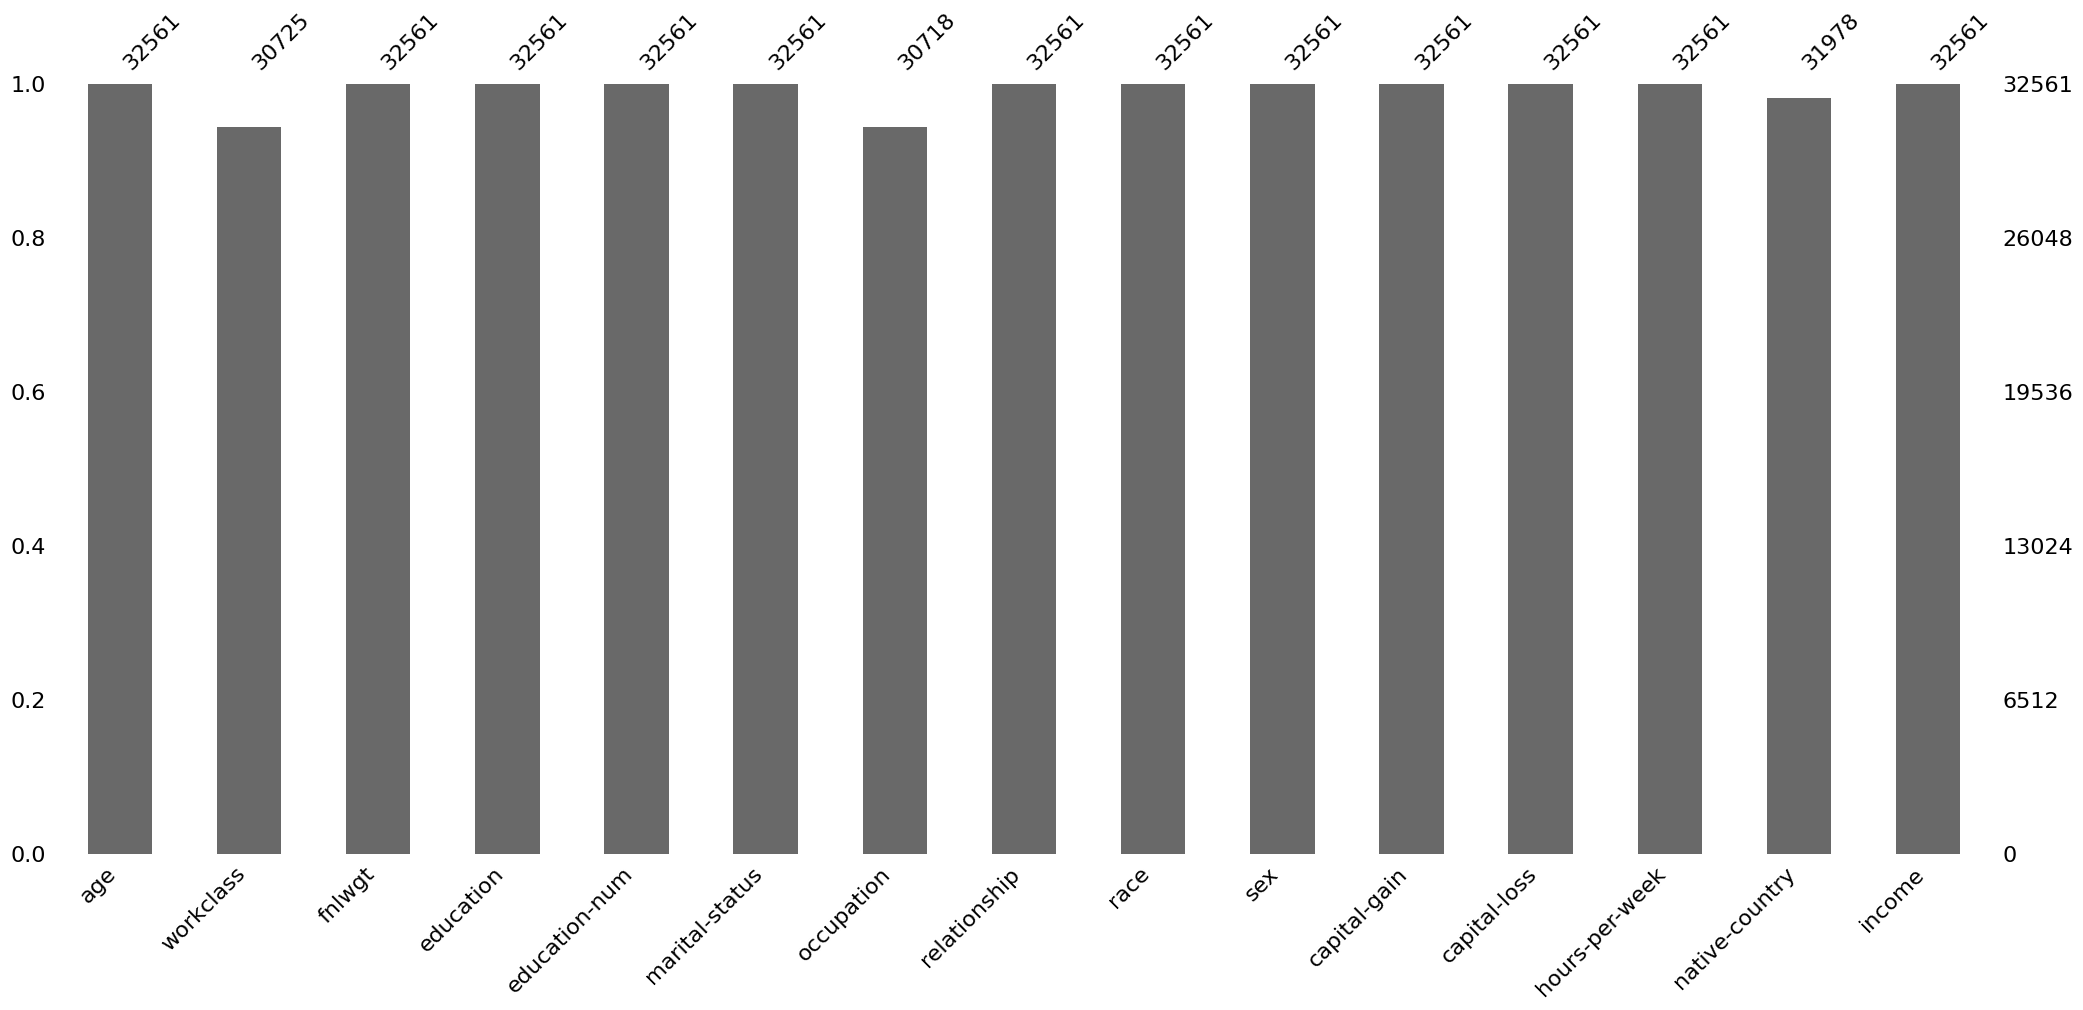

In [26]:
msno.bar(df);

# **Visualisation**
An essential phase in the data analysis process is data visualisation, which lets you examine, comprehend, and share trends and insights in your data. The general steps involved in data visualisation are as follows:


*   Find the objective
*   Analyse and understand the data
*   Choose the appropriate visualisation tools
*   Univariate exploration
*   Bivariate exploration
*   Consider Multivariate exploration
*   Choose appropriate Visual Encodings to represent the data




**Finding the Objective**: The purpose of the Census Income dataset visualisation might change depending on the particular objectives of the project or investigation. Nonetheless, the following are some typical goals and inquiries that the Census Income dataset visualisations could try to answer:

1.   Understanding the Income Distribution
2.   Demographic Analysis
3.   Employment Patterns
4.   Educational Attainment and Income
5.   Income Disparities Across Gender and Race
6.   Work Hours and Income
7.   Marital Status and Family Structure
8.   Geographic Analysis
9.   Identifying High-Income Occupations
10.  Predictive Modeling
11.  Feature Correlations







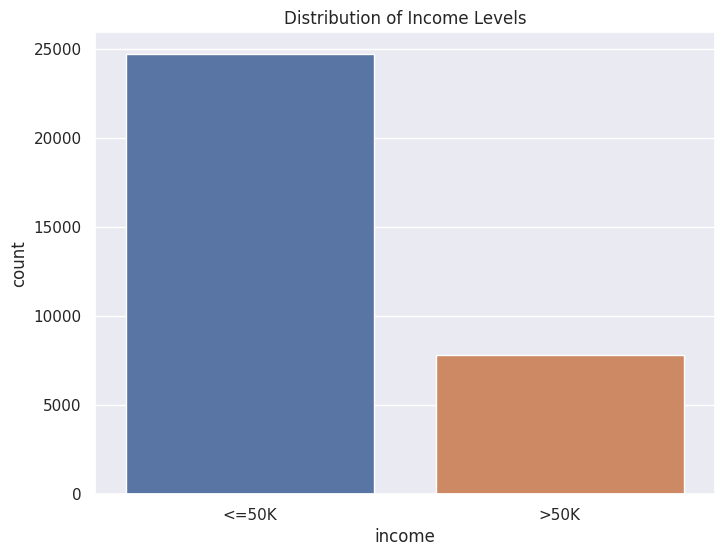

In [27]:
sns.set(style="darkgrid")

# Plotting a count plot for the 'income' column
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income Levels')
plt.show()

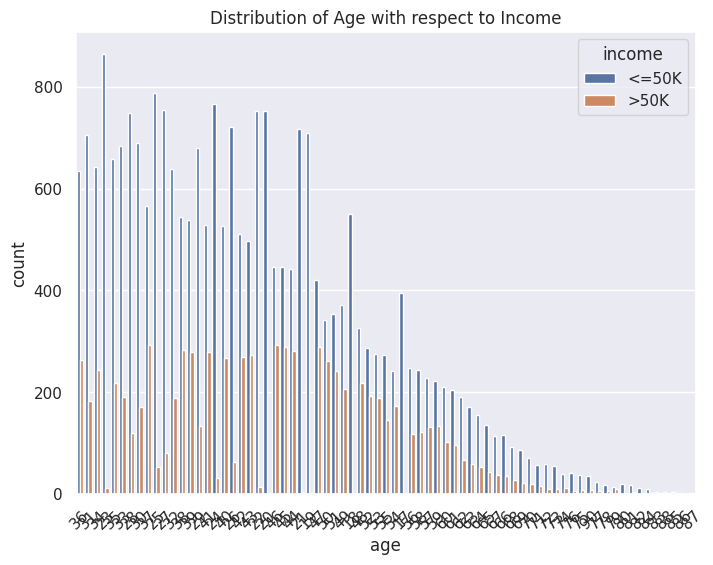

In [28]:
# Explore the distribution of age with respect to income
plt.figure(figsize=(8, 6))
sns.countplot(x='age', hue='income', data=df, order=df['age'].value_counts().index)
plt.title('Distribution of Age with respect to Income')
plt.xticks(rotation=45)
plt.show()

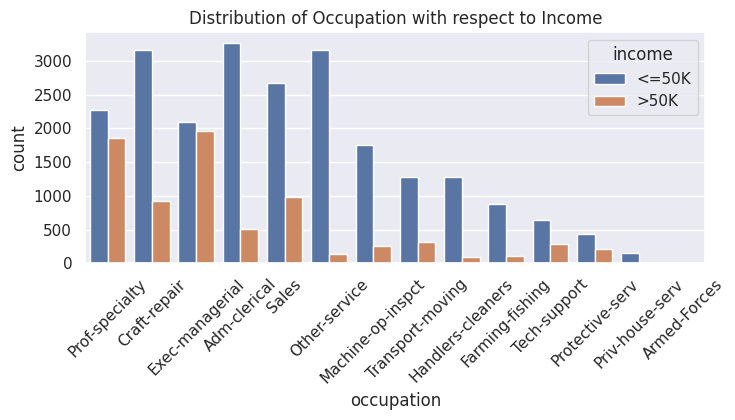

In [29]:
# Explore the distribution of occupation with respect to income
plt.figure(figsize=(8, 3))
sns.countplot(x='occupation', hue='income', data=df, order=df['occupation'].value_counts().index)
plt.title('Distribution of Occupation with respect to Income')
plt.xticks(rotation=45)
plt.show()

## **4. To address the question, "How would you describe the relationship between education level and income bracket in this dataset?"**

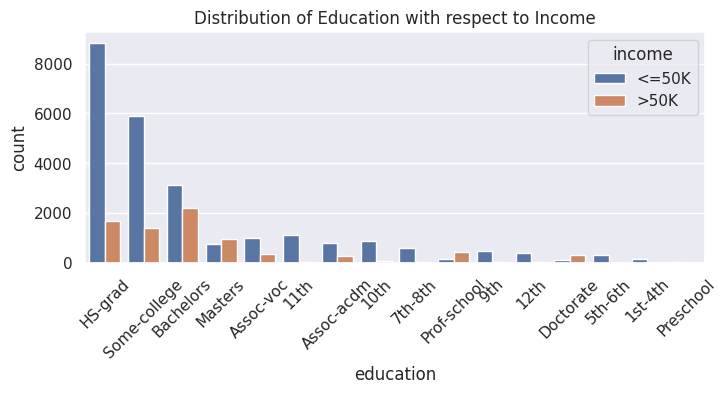

In [30]:
# Explore the distribution of education with respect to income
plt.figure(figsize=(8, 3))
sns.countplot(x='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title('Distribution of Education with respect to Income')
plt.xticks(rotation=45)
plt.show()

It is clear from the graph that the income changes with respect to the educational qualification that the people have

1. The x-axis represents different education levels, while the y-axis shows the count of individuals. Each education level is further divided into two segments based on income categories: '<=50K' and '>50K', represented by different colors.
2. The blue represents the individuals whose income are less than 50k and the red represnts the individuals whose income are higher than 50k. The height of each bar indicates the count of individuals with a specific education level, and the segments within each bar show the proportion of individuals with income levels below or above $50,000.

Education Level Influence on Income:

Individuals with higher education levels, such as those with a Bachelor's degree, Master's degree, or Doctorate, tend to have a higher representation in the '>50K' income bracket compared to those with lower education levels.
Income Disparities Across Education Levels:

Some education levels, such as 'Preschool,' '1st-4th,' and '5th-6th,' are associated with a higher proportion of individuals in the '<=50K' income bracket. This suggests that individuals with lower education levels are more prevalent in the lower income category.
Gradual Increase in '>50K' Bracket:

There appears to be a gradual increase in the proportion of individuals with income '>50K' as education levels progress from lower to higher categories. This trend is particularly evident for education levels such as 'HS-grad,' 'Some-college,' and beyond.
High-Income Peaks at Advanced Education Levels:

Peaks in the '>50K' income bracket are notable for education levels such as 'Bachelors,' 'Masters,' and 'Doctorate,' suggesting that individuals with advanced degrees are more likely to earn incomes above $50,000.
In summary, the dataset indicates a positive correlation between education level and income bracket. Generally, as education levels increase, there is a tendency for a higher proportion of individuals to fall into the '>50K' income category. However, individual cases may vary, and additional factors could influence the relationship between education and income.

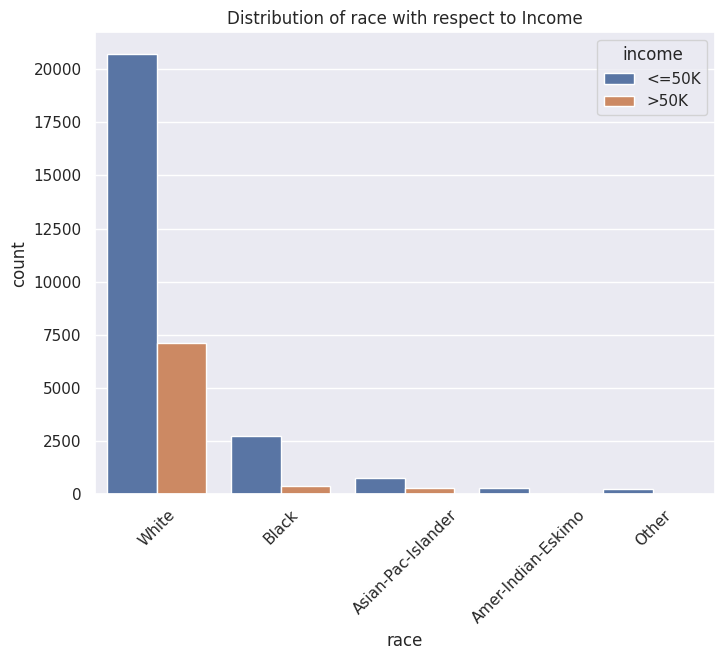

In [31]:
# Explore the distribution of race with respect to income
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='income', data=df, order=df['race'].value_counts().index)
plt.title('Distribution of race with respect to Income')
plt.xticks(rotation=45)
plt.show()

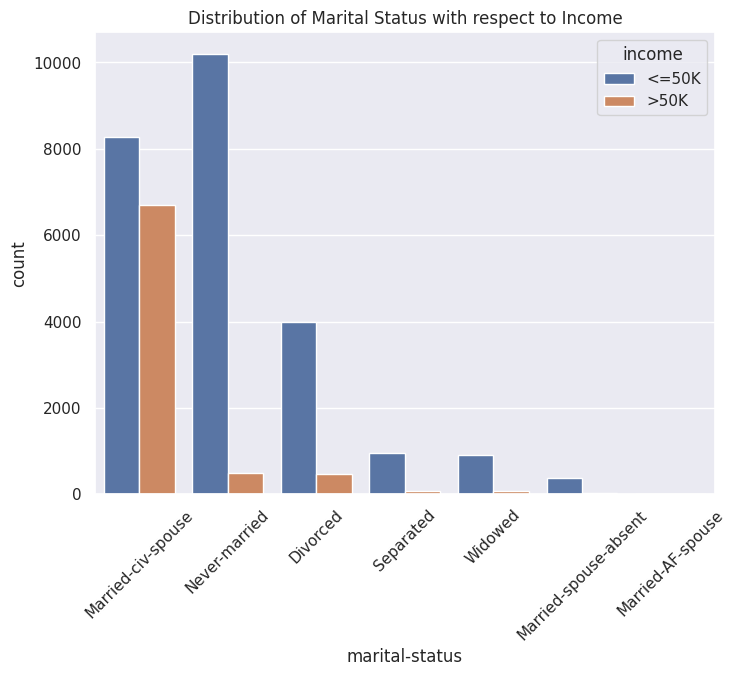

In [32]:
# Explore the distribution of marital status with respect to income
plt.figure(figsize=(8, 6))
sns.countplot(x='marital-status', hue='income', data=df, order=df['marital-status'].value_counts().index)
plt.title('Distribution of Marital Status with respect to Income')
plt.xticks(rotation=45)
plt.show()

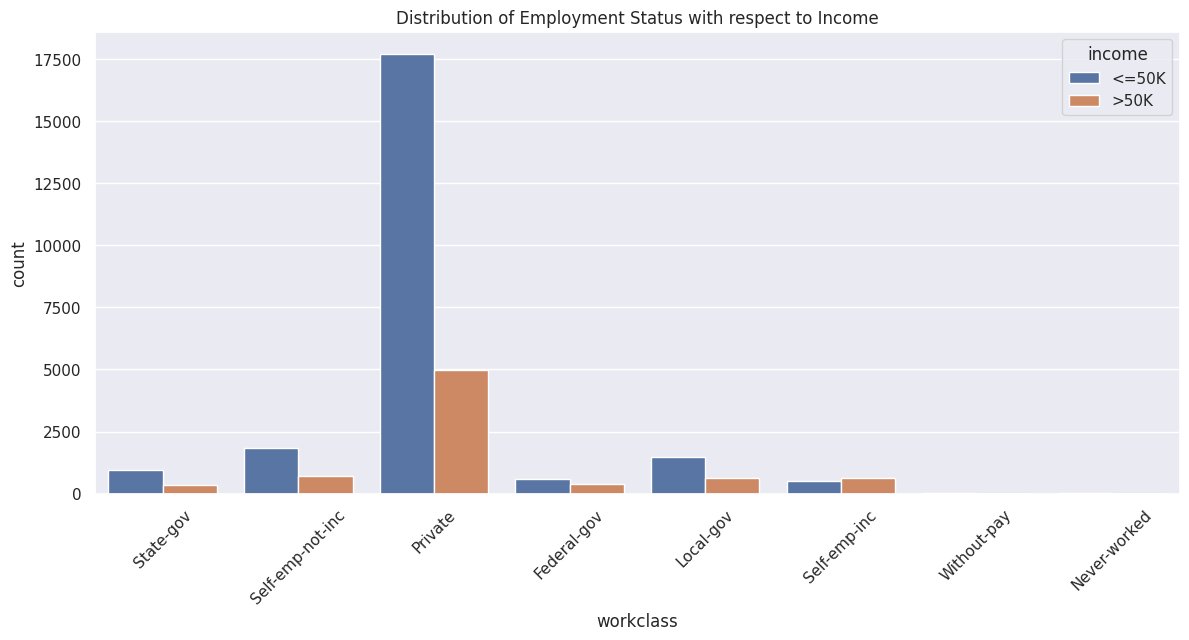

In [33]:
# Explore the distribution of workclass with respect to income
plt.figure(figsize=(14, 6))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Distribution of Employment Status with respect to Income')
plt.xticks(rotation=45)
plt.show()

Explore relationships between categorical variables using crosstabulations and perform a chi-square test to assess the independence of variables.

In [34]:
# Assuming 'income' is the binary outcome variable
X = df[['age', 'education-num', 'hours-per-week']]
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.787655458314141
              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      4942
        >50K       0.62      0.32      0.42      1571

    accuracy                           0.79      6513
   macro avg       0.71      0.63      0.64      6513
weighted avg       0.76      0.79      0.76      6513



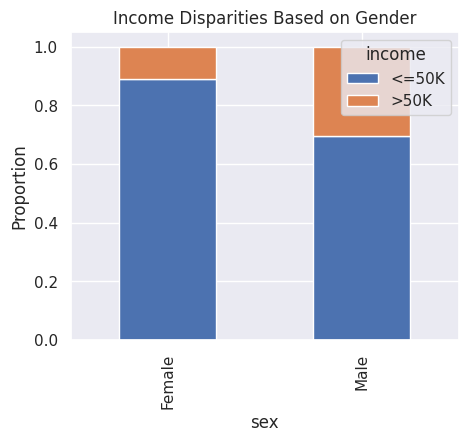

In [35]:
# Bar plot for average income based on gender
gender_income = df.groupby('sex')['income'].value_counts(normalize=True).unstack()
gender_income.plot(kind='bar', stacked=True, figsize=(5, 4))
plt.title('Income Disparities Based on Gender')
plt.xlabel('sex')
plt.ylabel('Proportion')
plt.show()

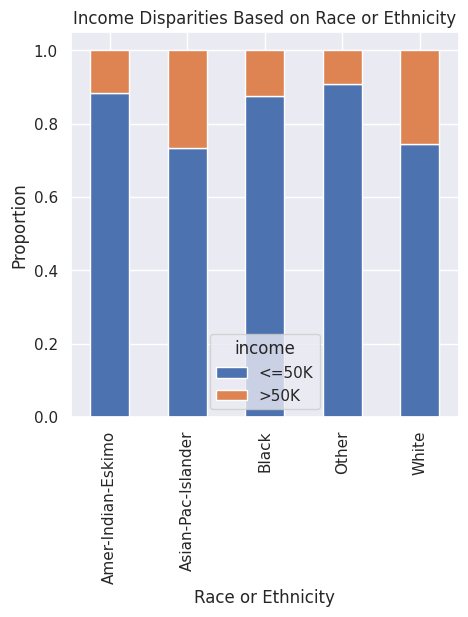

In [36]:
# Bar plot for average income based on race or ethnicity
race_income = df.groupby('race')['income'].value_counts(normalize=True).unstack()
race_income.plot(kind='bar', stacked=True, figsize=(5, 5))
plt.title('Income Disparities Based on Race or Ethnicity')
plt.xlabel('Race or Ethnicity')
plt.ylabel('Proportion')
plt.show()

## Outlier Detection

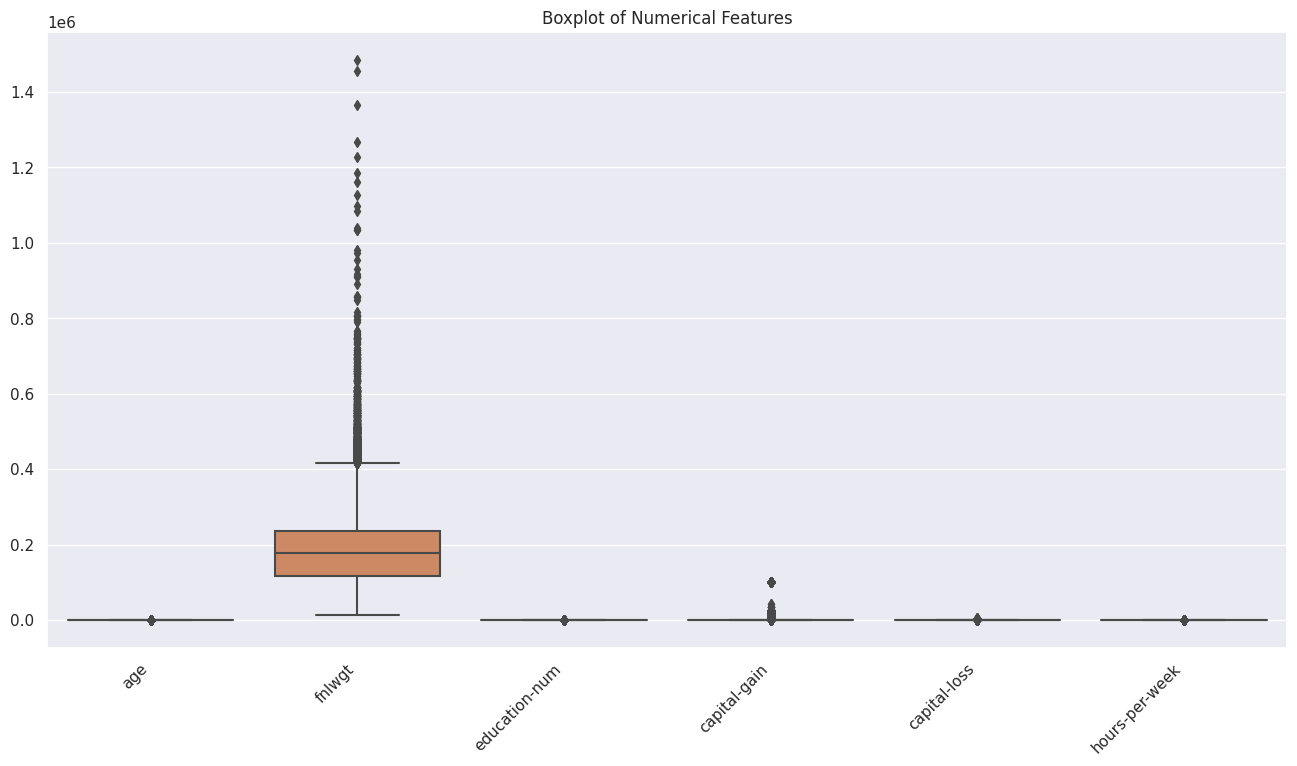


Outliers detected using the IQR method:
          Feature  Lower Bound  Upper Bound  Number of Outliers
0             age         -2.0         78.0                 143
1          fnlwgt     -61009.0     415887.0                 992
2   education-num          4.5         16.5                1198
3    capital-gain          0.0          0.0                2712
4    capital-loss          0.0          0.0                1519
5  hours-per-week         32.5         52.5                9008


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Assuming 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' are numerical features

# Select numerical features for outlier detection
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a box plot for each numerical feature
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate and display the number of outliers using the IQR method
outliers = []

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])

    outliers.append({
        'Feature': feature,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': num_outliers
    })

print("\nOutliers detected using the IQR method:")
print(pd.DataFrame(outliers))

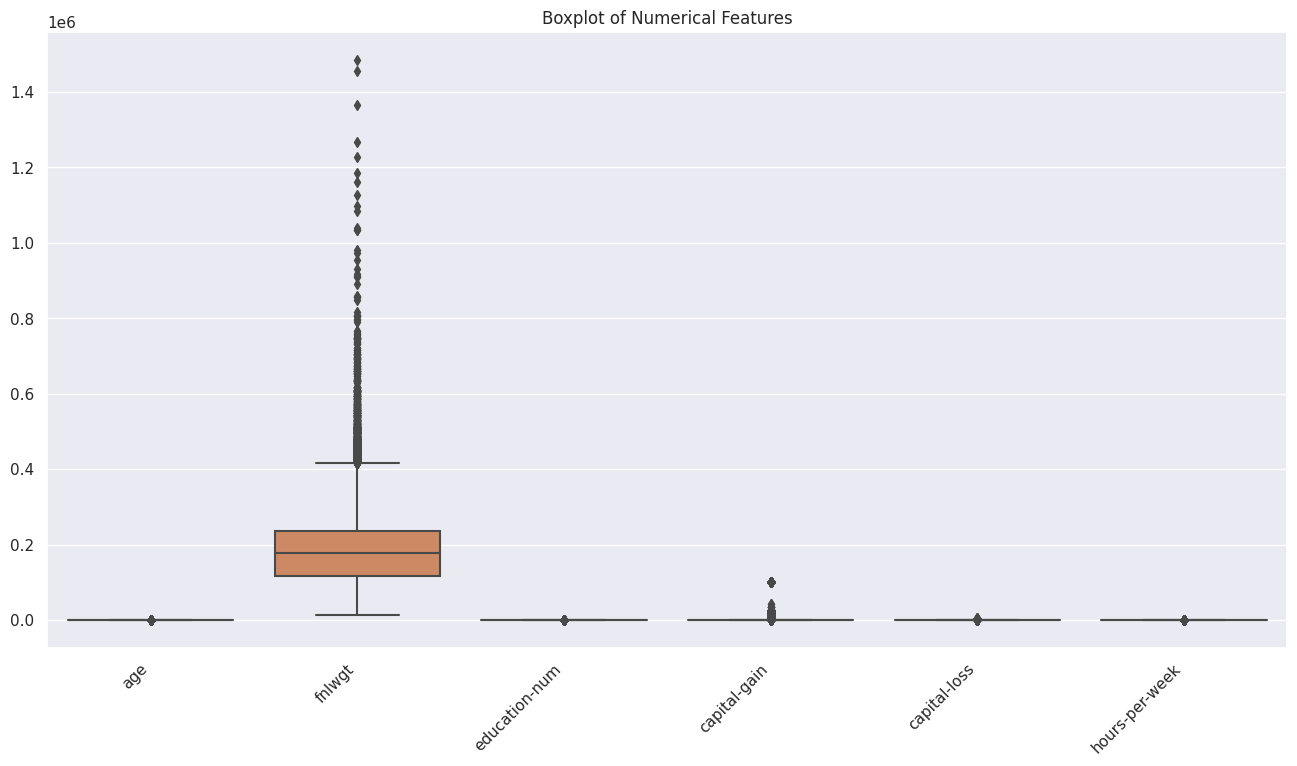

Shape before removing outliers: (32561, 15)
Shape after removing outliers: (18997, 15)


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Assuming 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' are numerical features

# Select numerical features for outlier detection
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a box plot for each numerical feature
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.show()

# Identify and remove outliers using the IQR method
outliers = []

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Append outliers to the list
    outliers.append(feature_outliers)

# Concatenate the outliers into a single DataFrame
all_outliers = pd.concat(outliers)

# Remove outliers from the original DataFrame
df_no_outliers = df[~df.index.isin(all_outliers.index)]

# Display the shape of the DataFrame before and after removing outliers
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

In [39]:
df_no_outliers

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


## **3. What signs of data skew do you see? Provide some histogram graphs for this question and interpret them.**

As discussed earlier, the dataset contains a lot of categorical values

Skewness is a statistical measure designed for numerical data, and it's not directly applicable to categorical values. Skewness measures the asymmetry of a distribution, and categorical variables don't have a distribution in the same way continuous numerical variables do so the skewness of only the numerical value is found

In [40]:
# Select categorical columns for one-hot encoding
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns)

# Display the encoded DataFrame
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,52,209642,9,0,0,45,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,321865,14,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32555,22,310152,10,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,27,257302,12,0,0,38,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


One-hot encoding is a common technique used to convert categorical variables into a format that can be provided to machine learning algorithms.

After applying one-hot encoding, we'll have a new DataFrame (df_encoded) with additional columns representing the one-hot encoded categorical variables. This new representation is suitable for feeding into machine learning models.

In [41]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a new DataFrame with only numerical columns
df_numerical = df[numerical_columns.columns]
df_numerical

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [42]:
# Select numerical features for analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness for each numerical feature
skewness = df[numerical_features].apply(lambda x: x.skew())

# Display skewness for each feature
print("Skewness for each feature:")
print(skewness)

Skewness for each feature:
age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64


Skewness before transformation:
age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

Skewness after transformation:
age              -0.113341
fnlwgt           -0.842461
education-num    -1.721180
capital-gain      3.096144
capital-loss      4.307537
hours-per-week   -2.357712
dtype: float64


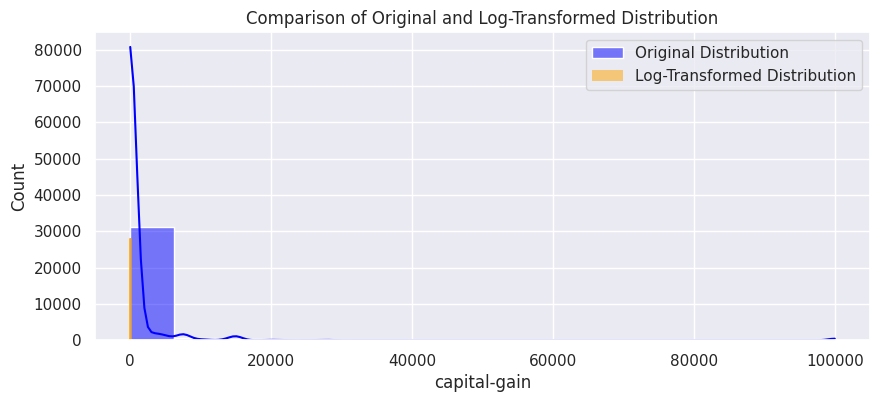

In [43]:
# Select numerical features for analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Display skewness before transformation
print("Skewness before transformation:")
print(df[numerical_features].apply(lambda x: x.skew()))

# Apply logarithmic transformation to reduce skewness
df_log_transformed = df.copy()
df_log_transformed[numerical_features] = df_log_transformed[numerical_features].apply(lambda x: np.log1p(x))

# Display skewness after transformation
print("\nSkewness after transformation:")
print(df_log_transformed[numerical_features].apply(lambda x: x.skew()))

# Visualize the distribution of one of the transformed features for illustration
plt.figure(figsize=(10, 4))
sns.histplot(df['capital-gain'], kde=True, color='blue', label='Original Distribution')
sns.histplot(df_log_transformed['capital-gain'], kde=True, color='orange', label='Log-Transformed Distribution')
plt.title('Comparison of Original and Log-Transformed Distribution')
plt.legend()
plt.show()

count    32561.000000
mean         0.240810
std          0.427581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income_numeric, dtype: float64


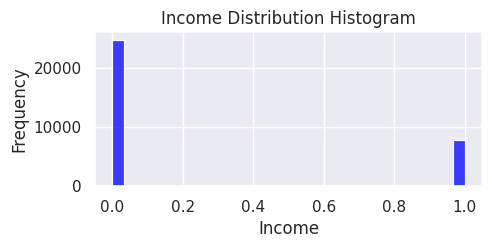

Positive skewness. The distribution is right-skewed.


In [44]:
# Convert the 'income' column to numeric values (assuming two categories: <=50K and >50K)
df['income_numeric'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Display basic statistics of the 'income_numeric' column
print(df['income_numeric'].describe())

# Plot a histogram for the 'income_numeric' column
plt.figure(figsize=(5, 2))
sns.histplot(df['income_numeric'], bins=30, kde=False, color='blue')
plt.title('Income Distribution Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness = df['income_numeric'].skew()

# Interpret skewness
if skewness > 0:
    print("Positive skewness. The distribution is right-skewed.")
elif skewness < 0:
    print("Negative skewness. The distribution is left-skewed.")
else:
    print("Zero skewness. The distribution is approximately symmetrical.")

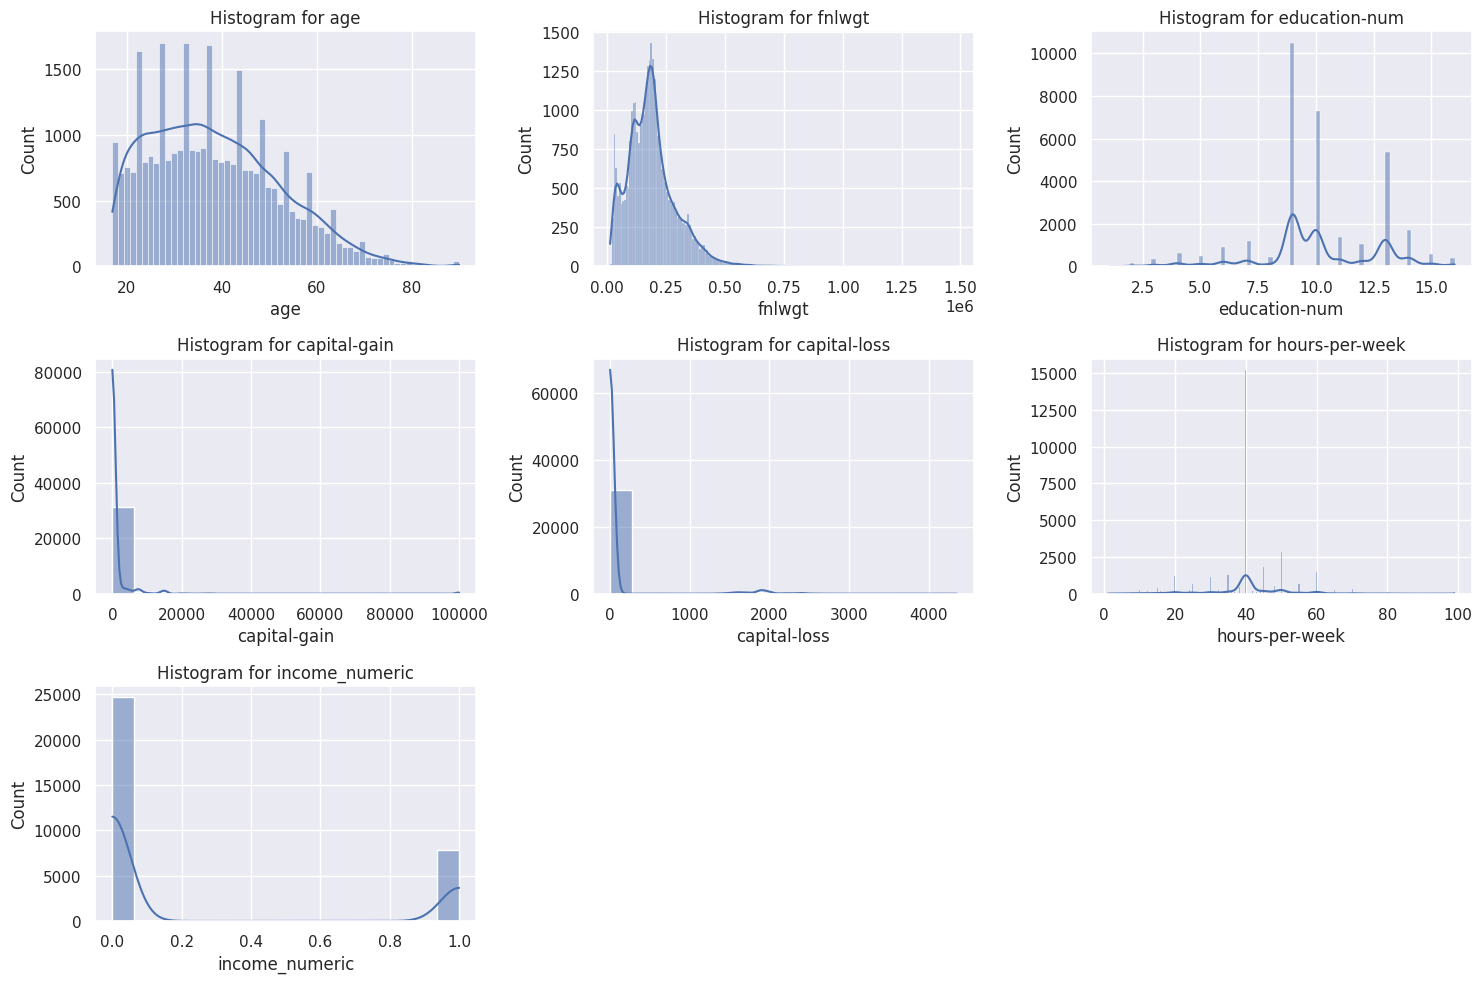

In [45]:
#What signs of data skew do you see
# Select numerical features for analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram for {feature}')

plt.tight_layout()
plt.show()

Correlation Analysis

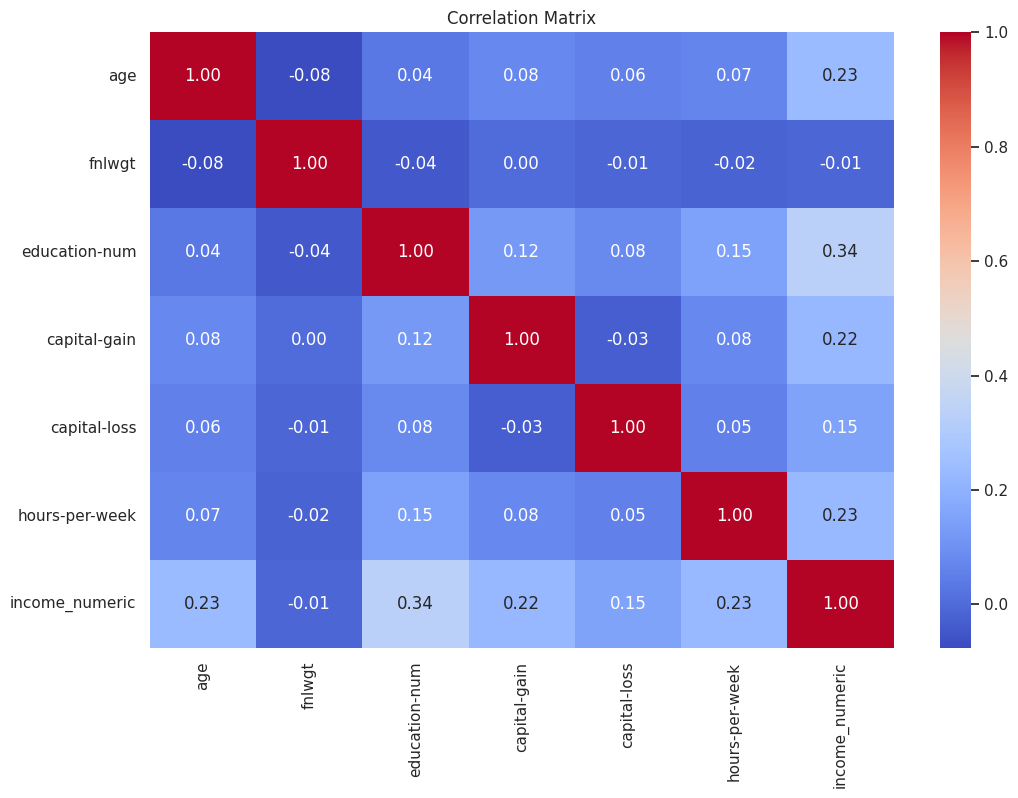

In [46]:
# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap provides a color-coded visualization of the correlation coefficients, where values closer to 1 or -1 indicate stronger correlations, and values closer to 0 indicate weaker correlations

The select_dtypes function is used to filter the numeric columns from the dataset.

The corr() function calculates the pairwise correlation coefficients between the numeric columns.

The heatmap from seaborn is used to create a visual representation of the correlation matrix.

# **Feature Engineering**
Feature engineering is a crucial step in the machine learning pipeline that involves transforming raw data into a format suitable for training a model. The goal is to create informative and relevant features that improve the performance of machine learning model

1. Handling Missing data

In [47]:
df=df.replace(-1,np.nan)

AttributeError: ignored

In [ ]:
# Print total number of NaN values
print('NaN values =', df.isnull().sum().sum())
print("\n")

missing_var = []

for feature in df.columns:
    miss = df[feature].isna().sum()
    if miss > 0:
        missing_var.append(feature)
        missing_val = miss / df.shape[0]
        print('The feature {} has {} records ({:.2%}) with missing values.'.format(feature, miss, missing_val))

print('There are {} features with missing values'.format(len(missing_var)))

In [ ]:
df

2. Encoding Categorical Variables:

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['income'] = label_encoder.fit_transform(df_encoded['income'])

In [ ]:
df_encoded

In [ ]:
# Calculate counts of individuals for each combination of 'marital-status' and 'sex'
gender_counts = df.groupby(['marital-status', 'sex']).size().reset_index(name='count')

# Calculate total counts for each 'marital-status' category
total_counts = df.groupby('marital-status').size().reset_index(name='total_count')

# Merge the two DataFrames to have counts for each 'marital-status' and 'sex'
merged_df = pd.merge(gender_counts, total_counts, on='marital-status')

# Calculate the percentage of individuals with different genders for each marital status
merged_df['percentage'] = (merged_df['count'] / merged_df['total_count']) * 100

# Display the resulting DataFrame
print(merged_df)

In [ ]:
# Create a cross-tabulation of gender and marital status
cross_tab = pd.crosstab(df['marital-status'], df['sex'])

# Plot the results (you can customize the plot as needed)
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution for Each Marital Status Category')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()